# Part 1: Data preprocessing

## Importing the libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
path="/content/Churn_Modelling.csv"
dataset = pd.read_csv(path)
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data exploration

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
dataset.shape

(10000, 14)

In [5]:
#Get columns name with datatype object without put it in table/dataframe
dataset.select_dtypes(include='object').columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [6]:
#checking for number of columns with object datatype
len(dataset.select_dtypes(include='object').columns)

3

In [7]:
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
#Statistical summary
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Dealing with missing values

In [9]:
dataset.isnull().values.any()

False

In [10]:
dataset.isnull().values.sum()

0

## Dealing with categorical data

### As I get Columns datatype and found three columns with object dtypes that mean they are categorical data

In [11]:
dataset['Surname'].unique()

#dataset[['Surname','Geography','Gender']]

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [12]:
dataset['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
dataset['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
#for checking number of unique values in column
dataset['Gender'].nunique()

2

In [15]:
dataset = dataset.drop(columns=['Surname','RowNumber','CustomerId'])
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
#After removing surname column w have now two columns with object dtypes
dataset.select_dtypes(include='object').columns

Index(['Geography', 'Gender'], dtype='object')

#### As I get befor unique values in ['Geography', 'Gender'] 
<b>The reason for using Dummy Variable(indicator variables):</b>

We use indicator variables so we can use categorical variables for regression analysis in the later modules.

In [17]:
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [18]:
# dataset.groupby('Geography').mean()

#### Now as it seems all averages almost the same in Gender

In [19]:
# dataset.groupby('Gender').mean()

## Countplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


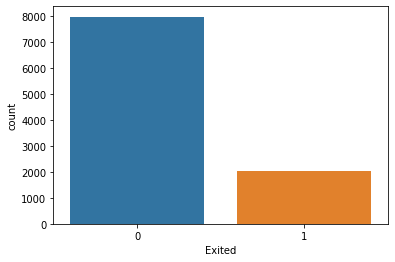

In [20]:
sns.countplot(dataset['Exited'])
plt.show()

In [21]:
(dataset.Exited == 0).sum()

7963

In [22]:
(dataset.Exited == 1).sum()

2037

## Correlation matrix and heatmap

In [23]:
# we have to drop the target variable
dataset_2 = dataset.drop(columns='Exited')    

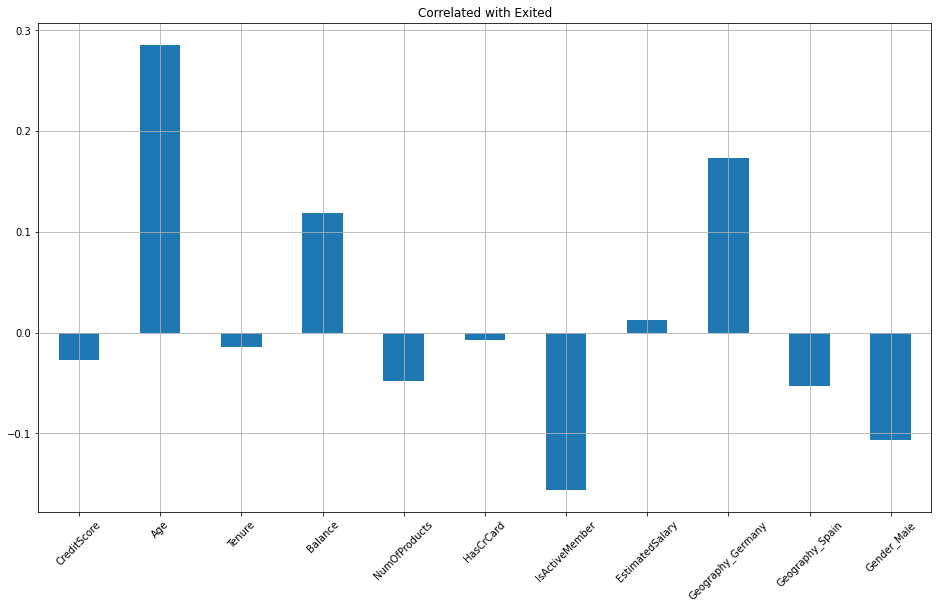

In [24]:
# Ploting all dataset corrleated with target variable dataset['Exited'] that i removed it form dataset 
dataset_2.corrwith(dataset['Exited']).plot.bar(figsize=(16,9), title='Correlated with Exited', rot=45, grid=True)

In [25]:
corr = dataset.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.010297,-0.006482,-0.008112
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.173488,-0.052667,-0.106512
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,0.173488,1.000000,-0.332084,-0.024628


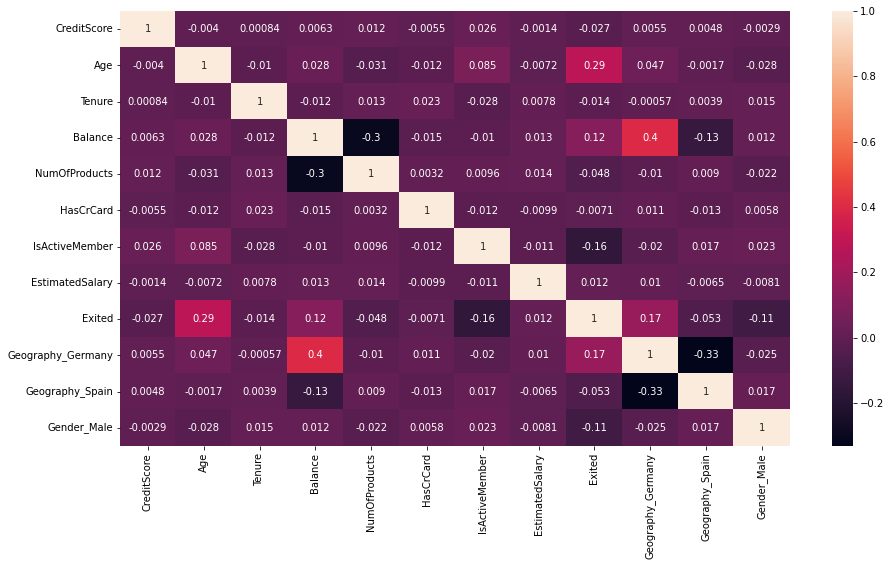

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(data=corr, annot=True) # add annot to visualize numbers on heatmap

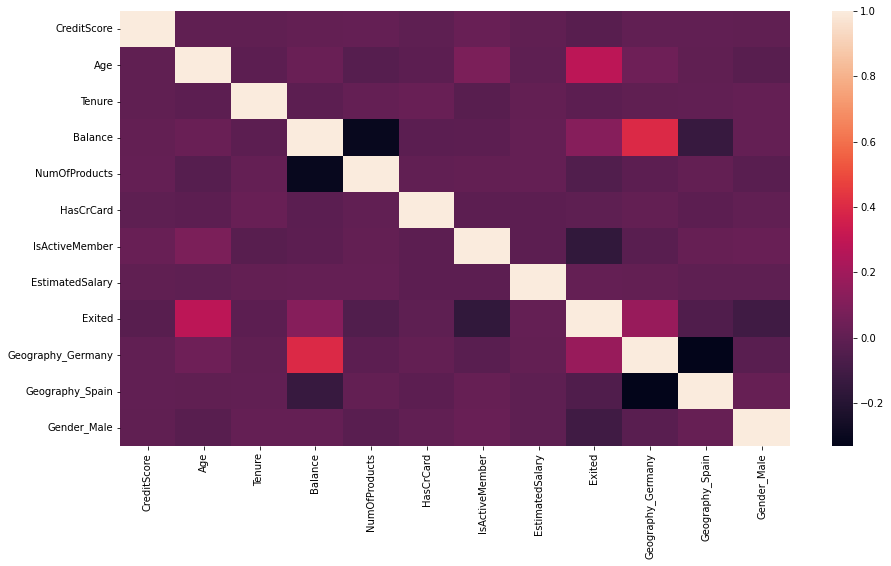

In [27]:
plt.figure(figsize=(15,8))
sns.heatmap(data=corr) #without annot=True

## Splitting the dataset

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [30]:
x = dataset.drop(columns='Exited')
y = dataset['Exited']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (8000, 11)
x_test:  (2000, 11)
y_train:  (8000,)
y_test:  (2000,)


## Feature scaling


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
sc = StandardScaler()


In [35]:
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [36]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [37]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

# Part 2: Building the model

## 1) Logistic regression


In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
classifier_lr = LogisticRegression()

In [40]:
classifier_lr.fit(x_train , y_train)
y_pred = classifier_lr.predict(x_test) 

### Notes: 
#### #For checking performance import important libraries

In [41]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [42]:
# all of these metirces to get performance take same parameters (target values,Estimated targets) = (y_test,y_pred)
acc =  accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

In [43]:
results = pd.DataFrame([['Logistic regression',acc,f1,rec,prec]], columns=['Model','accuracy_score','f1_score','recall_score','precision_score'])
results


,Model,accuracy_score,f1_score,recall_score,precision_score
0,Logistic regression,0.811,0.336842,0.237037,0.581818


### cross validation

In [44]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_lr, X=x_train, y=y_train ,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 80.84 %
Standard Deviation is 0.88 %


## 2) Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train,y_train)
y_pred = classifier_rf.predict(x_test)

In [46]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [47]:
# all of these metirces to get performance take same parameters (target values,Estimated targets) = (y_test,y_pred)
acc =  accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
prec = precision_score(y_test,y_pred)

In [48]:
rf_results = pd.DataFrame([['Random Forest',acc,f1,rec,prec]], columns=['Model','accuracy_score','f1_score','recall_score','precision_score'])
rf_results

,Model,accuracy_score,f1_score,recall_score,precision_score
0,Random Forest,0.8645,0.602056,0.506173,0.742754


<p>AS it appear in below dataframe that random forest accuracy is higher

In [49]:
results = results.append(rf_results,ignore_index=True)
results

,Model,accuracy_score,f1_score,recall_score,precision_score
0,Logistic regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest,0.8645,0.602056,0.506173,0.742754


### Cros Validation

In [50]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier_rf, X=x_train, y=y_train ,cv=10)
print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.02 %
Standard Deviation is 1.15 %


## 3) XGBoost

In [51]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier()
classifier_xgb.fit(x_train, y_train)

XGBClassifier()

In [52]:
# base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=1, gamma=0,
#               learning_rate=0.1, max_delta_step=0, max_depth=3,
#               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1

In [53]:
y_pred = classifier_xgb.predict(x_test)

In [54]:
# # best estimator
# base_score=0.5, booster='gbtree', colsample_bylevel=1,
#               colsample_bynode=1, colsample_bytree=0.7, gamma=0.1,
#               learning_rate=0.1, max_delta_step=0, max_depth=4,
#               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
#               nthread=None, objective='binary:logistic', random_state=0,
#               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
#               silent=None, subsample=1, verbosity=1

In [55]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

rf_results = pd.DataFrame([['XGBoost classifier',acc,f1,rec,prec]], columns=['Model','accuracy_score','f1_score','recall_score','precision_score'])

results = results.append(rf_results, ignore_index=True)
results

,Model,accuracy_score,f1_score,recall_score,precision_score
0,Logistic regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest,0.8645,0.602056,0.506173,0.742754
2,XGBoost classifier,0.8645,0.605531,0.513580,0.737589


### Cross validation

In [56]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.25 %
Standard Deviation is 1.02 %


# Part 3: Randomized Search to find the best parameters (XGBoost Classifier)

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
Parameters = {
    'learning_rate':[0.05, 0.1, 0.15, 0.20, 0.25, 0.30],
    'max_depth':[3, 4, 5 , 6, 7, 8 , 10, 12, 15],
    'min_child_weight':[1, 3, 5, 7],
    'gamma':[0.0, 0.1, 0.2, 0.3, 0.4],
    'colsample_bytree':[0.3, 0.4, 0.5, 0.7]  
}

In [59]:
randomized_search = RandomizedSearchCV(estimator=classifier_xgb, param_distributions=Parameters, n_iter=5,
                                       n_jobs=-1, scoring='r2', cv=5, verbose=3)

In [60]:
randomized_search.fit(x_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='r2', verbose=3)

In [61]:
randomized_search.best_estimator_

XGBClassifier(colsample_bytree=0.4, gamma=0.4, max_depth=6)

In [62]:
randomized_search.best_params_

{'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 0.4,
 'colsample_bytree': 0.4}

In [63]:
randomized_search.best_score_

0.16403217336935622

# Part 4: Final Model (XGBoost Classifier)

In [64]:
from xgboost import XGBClassifier
classifier = XGBClassifier(booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
classifier.fit(x_train, y_train)

XGBClassifier()

In [65]:
y_pred = classifier_xgb.predict(x_test)

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

final_results = pd.DataFrame([['XGBoost classifier Final',acc,f1,rec,prec]], columns=['Model','accuracy_score','f1_score','recall_score','precision_score'])

results = results.append(final_results, ignore_index=True)
results

,Model,accuracy_score,f1_score,recall_score,precision_score
0,Logistic regression,0.8110,0.336842,0.237037,0.581818
1,Random Forest,0.8645,0.602056,0.506173,0.742754
2,XGBoost classifier,0.8645,0.605531,0.513580,0.737589
3,XGBoost classifier Final,0.8645,0.605531,0.513580,0.737589


## cross validation

In [66]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=x_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 86.25 %
Standard Deviation is 1.02 %


# Part 5: Predicting a single observation

In [67]:
dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [68]:
single_obs = [[608,	41,	1	,83807.86,	1,	0,	1,	112542.58,0,	1	,0]]

In [70]:
classifier.predict(sc.transform(single_obs))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([0])